In [1]:
import pymysql #Allows the connection to mysql
import pandas as pd #We need pandas to obtain a Data Frame
import getpass # function to prompt a cell to write down our password
from sqlalchemy import create_engine #Method to produce an engine based on a URL, that includes, host, user....
import matplotlib.pyplot as plt #Importing this library for plot generation
import pylab #It allows to manipulate matplotlib labels

In [2]:
user = getpass.getuser()
password = getpass.getpass(prompt="Please enter your MySQL password",stream=None)
engine = create_engine('mysql+pymysql://{}:{}@localhost:3306/classicmodels'.format(user,password))
connection = pymysql.connect(host='localhost',user=user,password=password,db='classicmodels')

Please enter your MySQL password········


In [3]:
a="""SELECT  productLine,
        SUM(quantityOrdered*priceEach) AS TotalSalesVolume
FROM    productlines
        JOIN products USING (productLine)
        JOIN orderdetails USING (productCode)
GROUP BY    productLine
ORDER BY    TotalSalesVolume DESC;""" 

In [4]:
salesProduct=pd.read_sql_query(a,engine)

In [5]:
pd.DataFrame(salesProduct, columns=['productLine', 'TotalSalesVolume' ])#Creating the data frame

,productLine,TotalSalesVolume
0,Classic Cars,3853922.49
1,Vintage Cars,1797559.63
2,Motorcycles,1121426.12
3,Trucks and Buses,1024113.57
4,Planes,954637.54
5,Ships,663998.34
6,Trains,188532.92


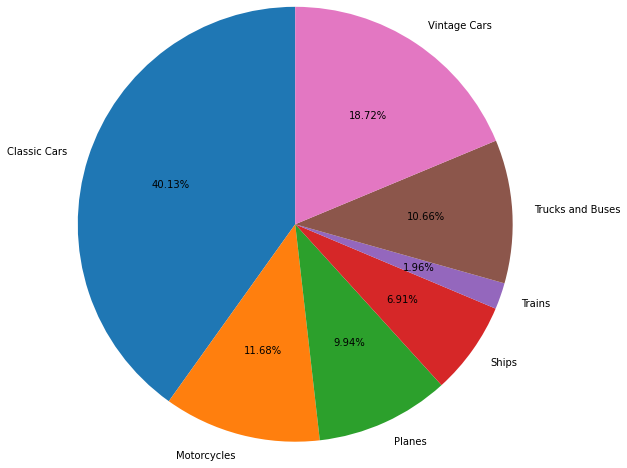

In [6]:
# Plotting the pie chart for above dataframe
salesProduct.groupby(['productLine']).sum().plot(kind ='pie',legend=None, y='TotalSalesVolume',
                                                radius = 2.5, startangle=90,autopct = '%2.2f%%')
pylab.ylabel(""); #Removes label from axe "y"

